In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("sierraleone-bumbuna.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
# Basic summary of numeric columns
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
# Count of missing values per column
missing = df.isna().sum()
missing[missing > 0]

Comments    525600
dtype: int64

In [4]:
# Columns with >5% missing values
threshold = 0.05 * len(df)
missing[missing > threshold]


Comments    525600
dtype: int64

In [5]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-score calculation
z_scores = df[cols_to_check].apply(zscore)
outliers = (z_scores.abs() > 3)

# Flag rows with any outlier
df['outlier_flag'] = outliers.any(axis=1)

# Clean: impute missing values in key columns using median
df_clean = df.copy()
df_clean[cols_to_check] = df_clean[cols_to_check].fillna(df_clean[cols_to_check].median())


In [6]:
df_clean.to_csv("data/sierraleone-bumbuna_clean.csv", index=False)


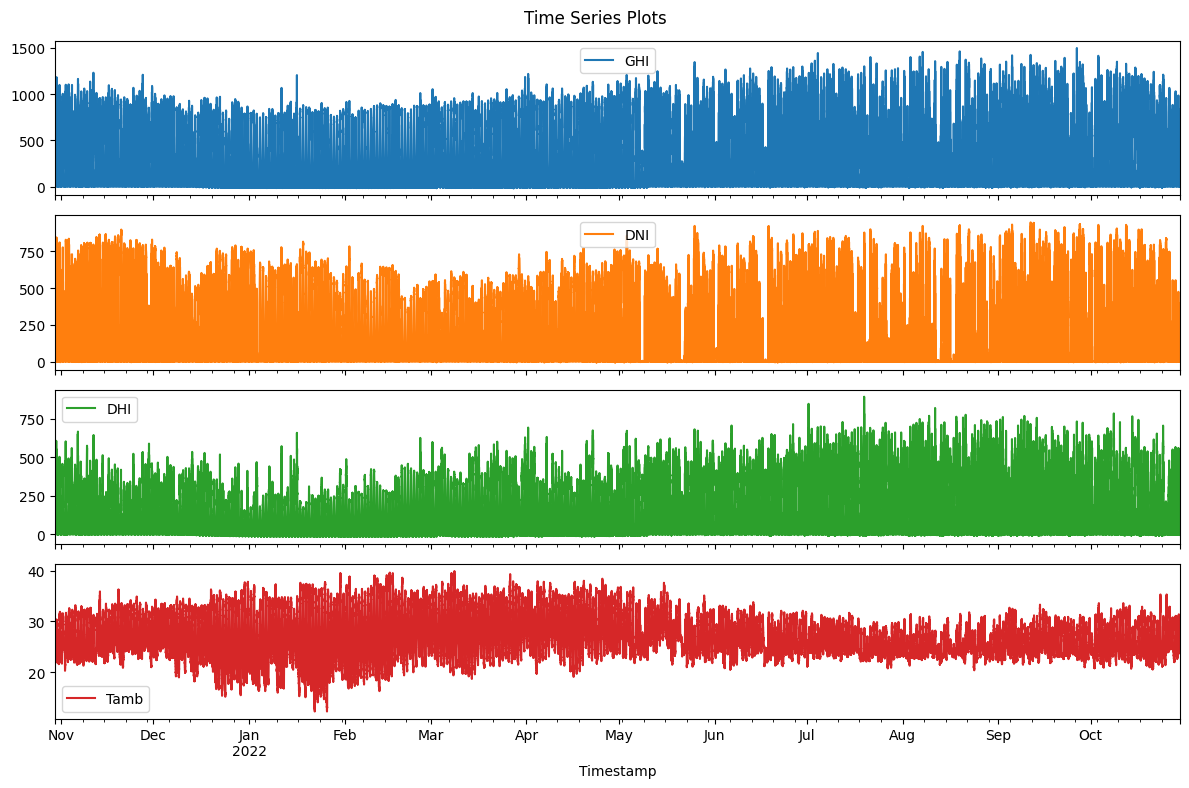

In [7]:
# Convert timestamp column
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Plot time series of GHI, DNI, DHI, Tamb
ts_cols = ['GHI', 'DNI', 'DHI', 'Tamb']

df_clean.set_index('Timestamp')[ts_cols].plot(subplots=True, figsize=(12, 8), title="Time Series Plots")
plt.tight_layout()
plt.show()


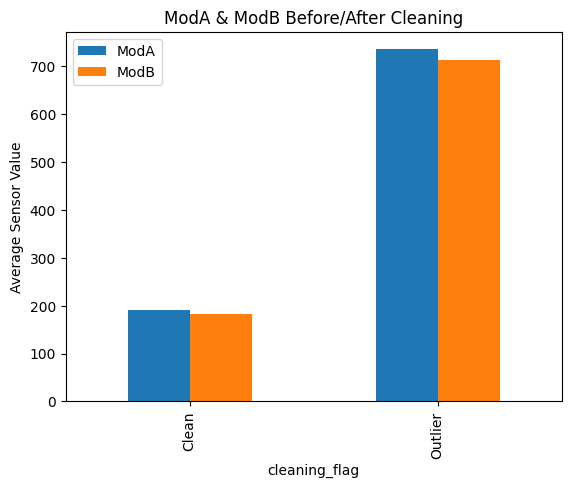

In [8]:
df_clean['cleaning_flag'] = df['outlier_flag']

df_clean.groupby('cleaning_flag')[['ModA', 'ModB']].mean().plot(kind='bar', title='ModA & ModB Before/After Cleaning')
plt.xticks([0,1], ['Clean', 'Outlier'])
plt.ylabel("Average Sensor Value")
plt.show()


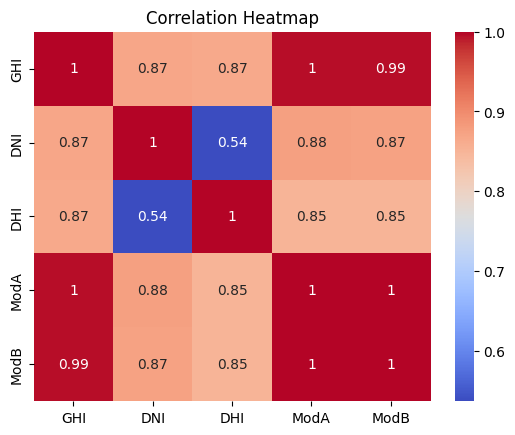

In [9]:
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


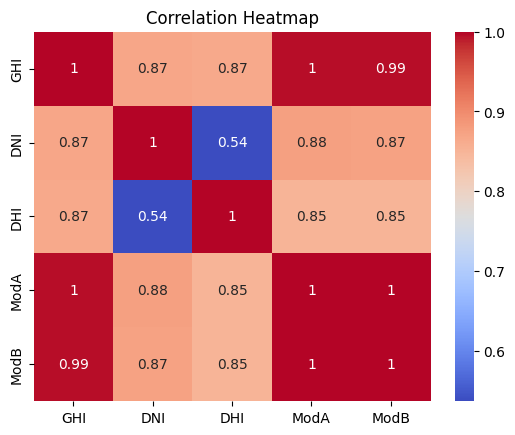

In [10]:
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


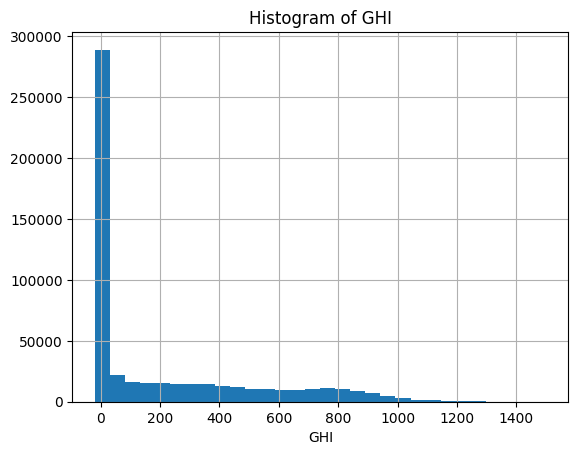

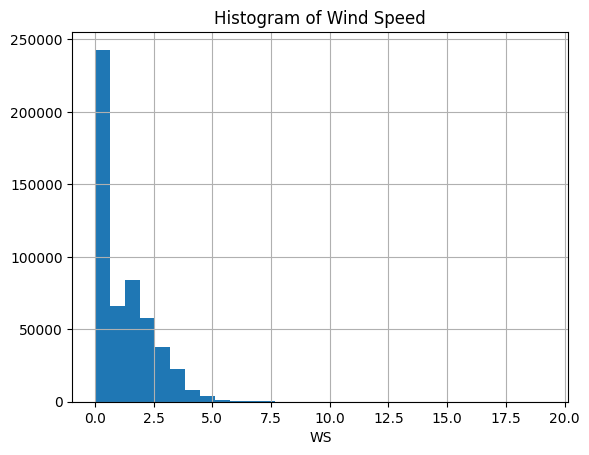

In [11]:
# Histograms
df_clean['GHI'].hist(bins=30)
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.show()

df_clean['WS'].hist(bins=30)
plt.title('Histogram of Wind Speed')
plt.xlabel('WS')
plt.show()


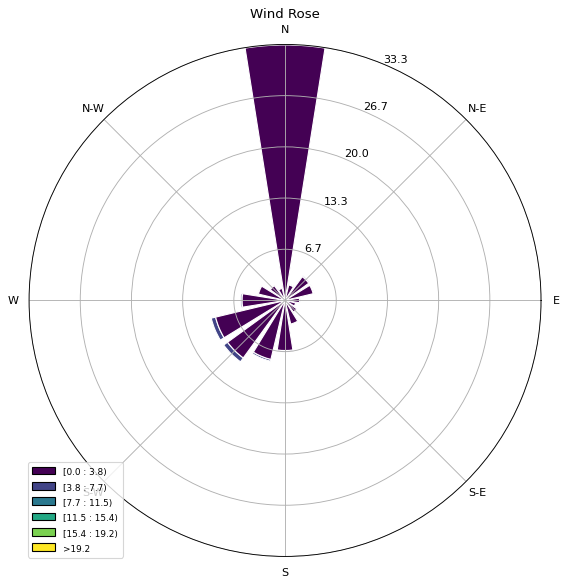

In [12]:
#optional 
try:
    from windrose import WindroseAxes

    ax = WindroseAxes.from_ax()
    ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title("Wind Rose")
    plt.show()
except:
    print("Windrose plot skipped. Install 'windrose' library if needed.")


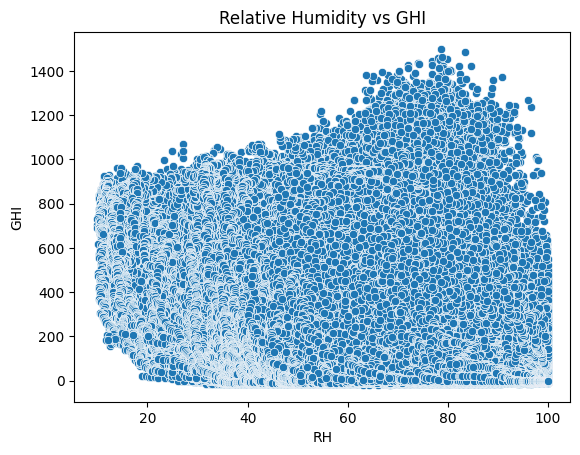

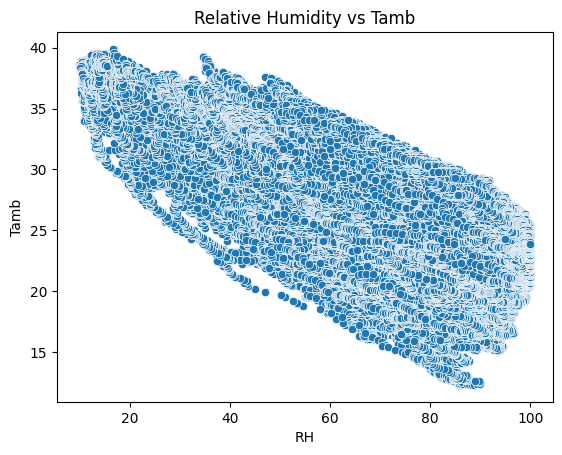

In [13]:
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title("Relative Humidity vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs Tamb")
plt.show()


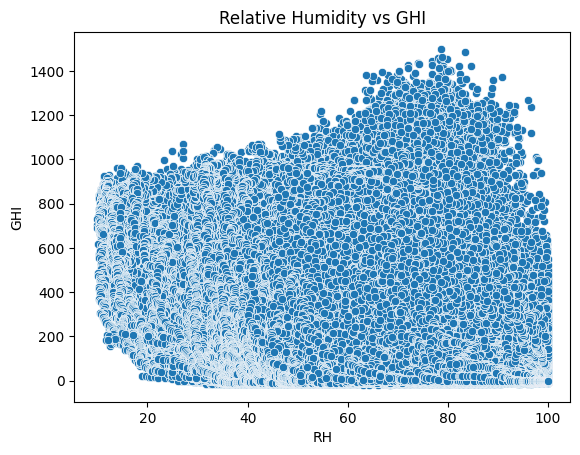

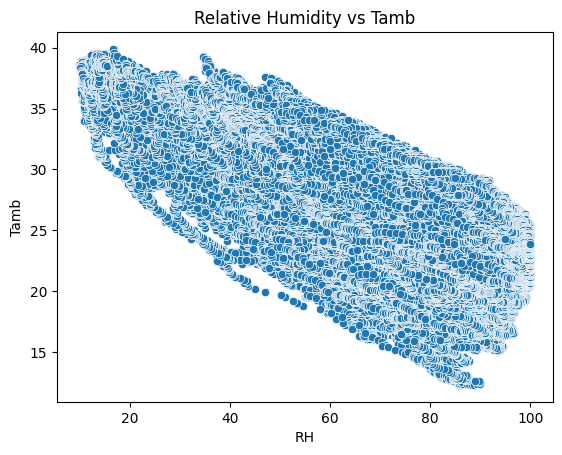

In [14]:
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title("Relative Humidity vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs Tamb")
plt.show()
